In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tensor_local = torch.load(r'C:\Users\user\Documents\GitHub\mmpose\my_code\pred_tensor_local.pt')
tensor_a100 = torch.load(r'C:\Users\user\Documents\GitHub\mmpose\my_code\pred_tensor_a100.pt')

In [3]:
def visualize_heatmaps(tensor):
    # 텐서를 CPU로 이동하고 NumPy 배열로 변환
    tensor = tensor.cpu().detach().numpy()
    
    batch_size, num_joints, height, width = tensor.shape
    
    fig, axes = plt.subplots(batch_size, num_joints, figsize=(20, 5*batch_size))
    
    for batch in range(batch_size):
        for joint in range(num_joints):
            ax = axes[batch, joint] if batch_size > 1 else axes[joint]
            im = ax.imshow(tensor[batch, joint], cmap='hot', interpolation='nearest')  # .numpy() 제거
            ax.set_title(f'Batch {batch+1}, Joint {joint+1}')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

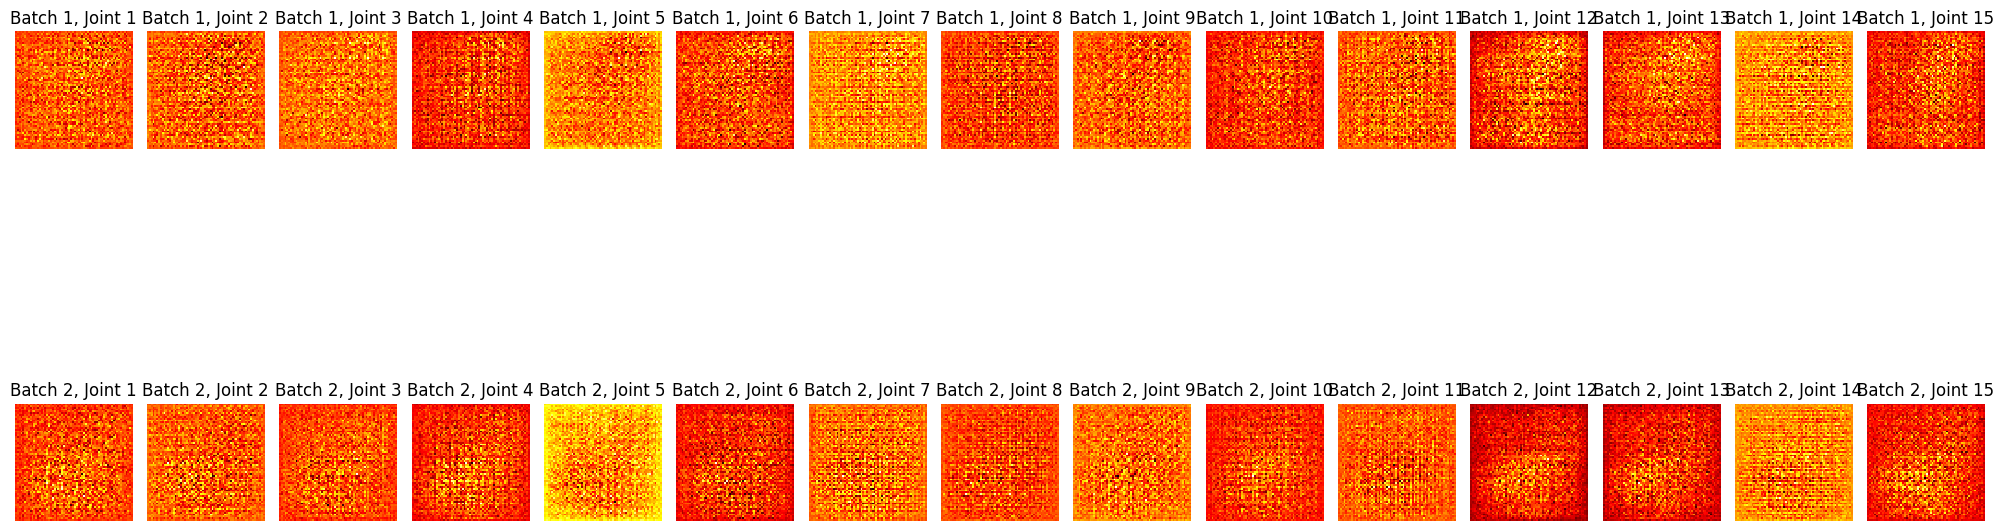

In [11]:
visualize_heatmaps(tensor_a100)

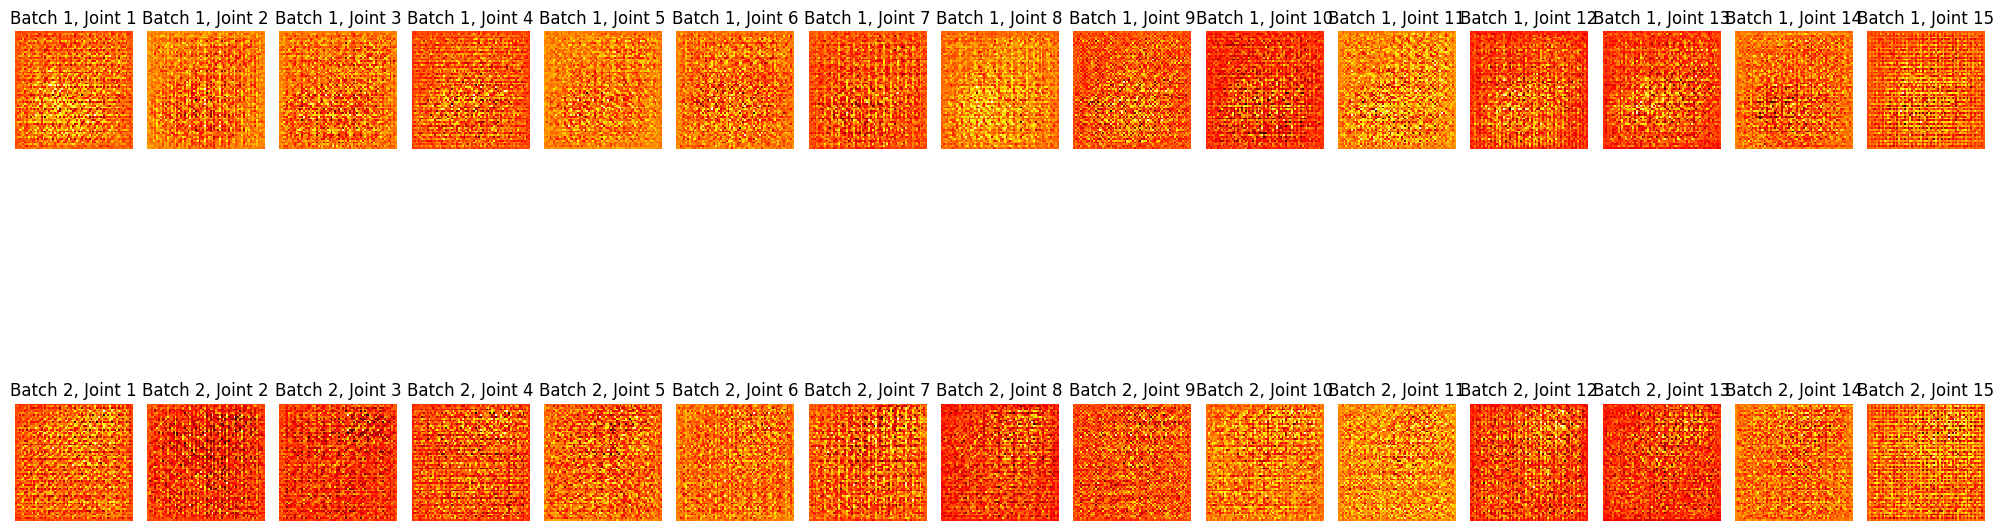

In [4]:
visualize_heatmaps(tensor_local)

In [5]:
def combine_heatmaps(tensor):
    tensor = tensor.cpu().detach().numpy()   
    num_batches, num_joints, width, height = tensor.shape
    
    for batch_idx in range(num_batches):
        combined_heatmap = np.zeros((width, height))
        
        for joint_idx in range(num_joints):
            combined_heatmap += tensor[batch_idx, joint_idx]
        
        plt.imshow(combined_heatmap, cmap='hot', interpolation='nearest')
        plt.title(f'Combined Heatmap for Batch {batch_idx+1}')
        plt.colorbar()
        plt.show()



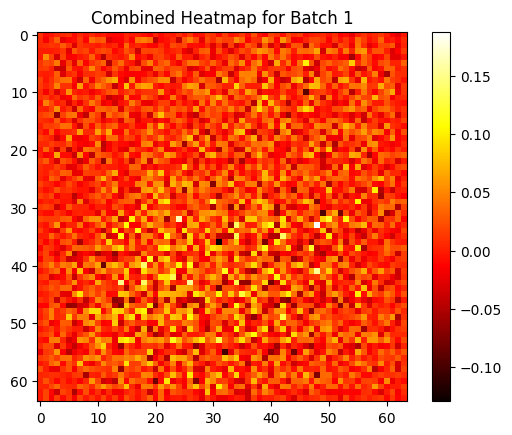

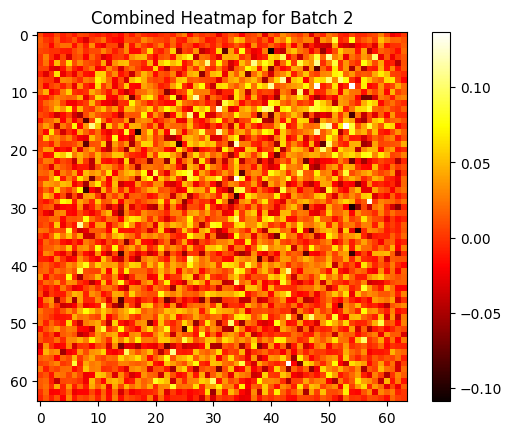

In [6]:
combine_heatmaps(tensor_local)

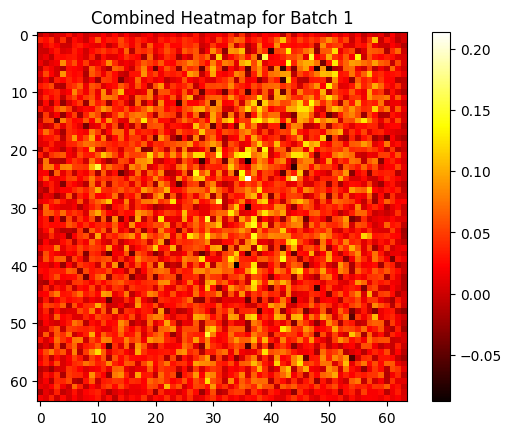

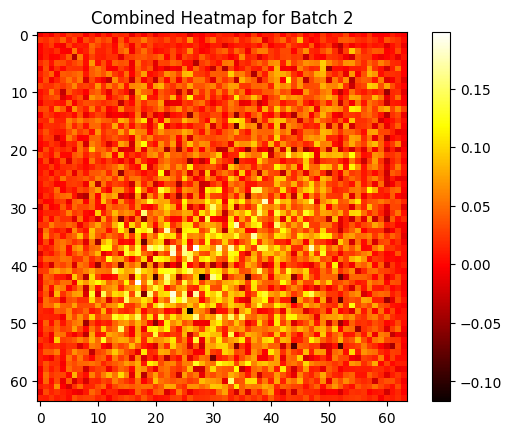

In [7]:
combine_heatmaps(tensor_a100)

In [8]:
tensor_local.shape

torch.Size([2, 15, 64, 64])

In [9]:

def compare_pt_files(tensor1, tensor2, tolerance=1e-5):

    
    # 기본 속성 비교
    if tensor1.shape != tensor2.shape:
        print(f"Shape mismatch: {tensor1.shape} vs {tensor2.shape}")
        return False
    
    if tensor1.dtype != tensor2.dtype:
        print(f"Dtype mismatch: {tensor1.dtype} vs {tensor2.dtype}")
        return False
    
    # 텐서 값 비교
    if torch.allclose(tensor1, tensor2, rtol=tolerance, atol=tolerance):
        print("The tensors are equal within the specified tolerance.")
        return True
    else:
        # 차이가 있는 경우 추가 정보 제공
        diff = torch.abs(tensor1 - tensor2)
        max_diff = torch.max(diff).item()
        print(f"Maximum difference: {max_diff}")
        
        # 차이가 가장 큰 위치 찾기
        max_diff_index = torch.argmax(diff)
        print(f"Location of maximum difference: {max_diff_index}")
        
        print(f"Value in tensor1 at max diff: {tensor1[max_diff_index]}")
        print(f"Value in tensor2 at max diff: {tensor2[max_diff_index]}")
        
        return False


In [10]:
compare_pt_files(tensor_local, tensor_a100)

Maximum difference: 0.0718827024102211
Location of maximum difference: 59924


IndexError: index 59924 is out of bounds for dimension 0 with size 2